In [1]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = "TSLA.csv"
df = pd.read_csv(dataset, sep=",")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


In [3]:
df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
df

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3348,2023-10-17,254.850006
3349,2023-10-18,242.679993
3350,2023-10-19,220.110001
3351,2023-10-20,211.990005


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3353 non-null   object 
 1   Close   3353 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.5+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3353 entries, 0 to 3352
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3353 non-null   datetime64[ns]
 1   Close   3353 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.5 KB


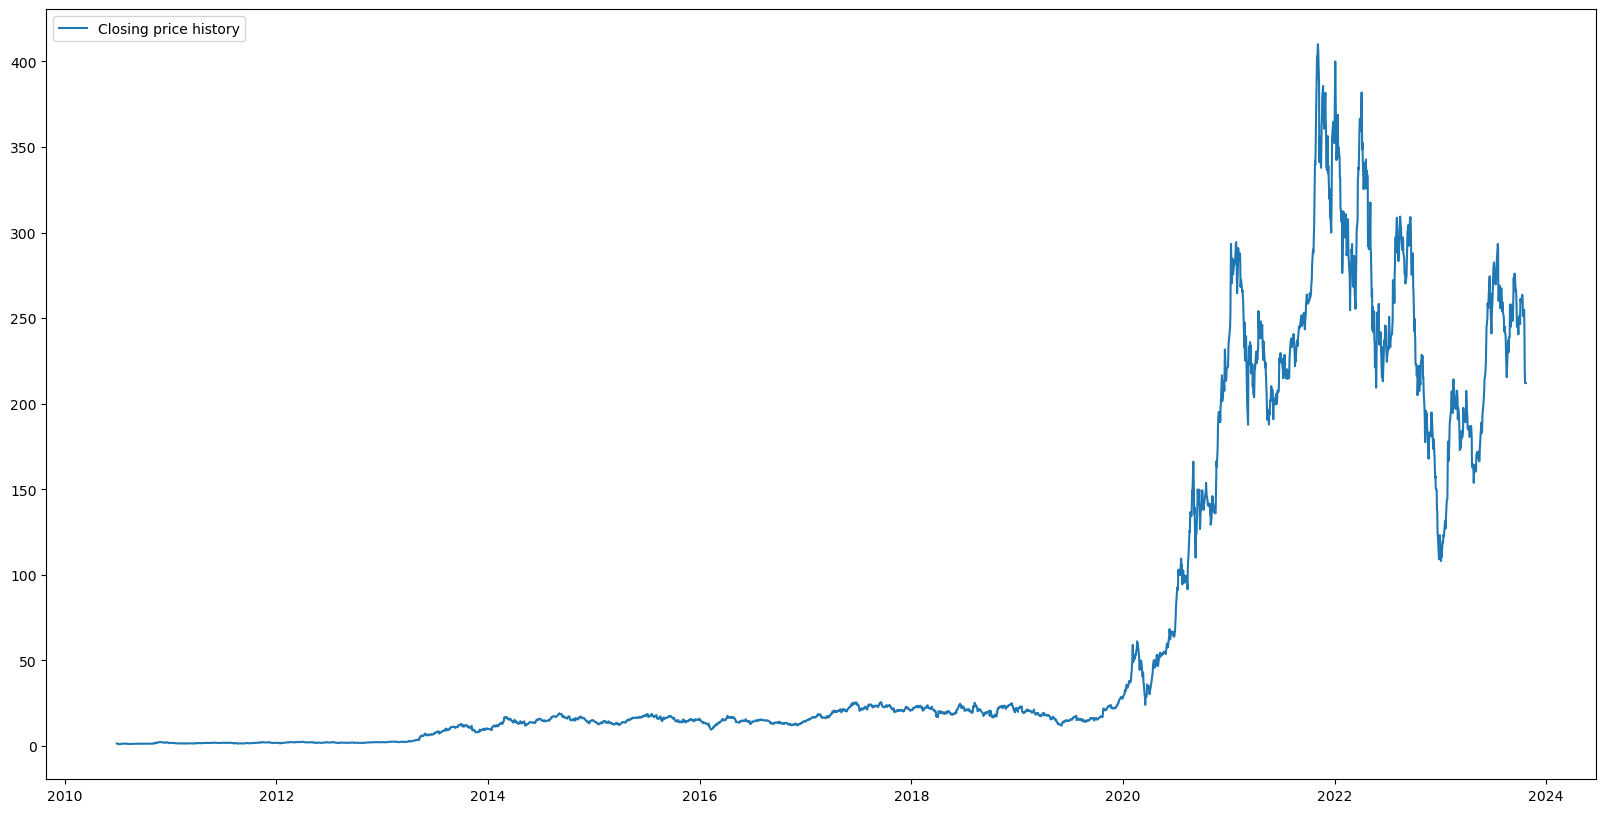

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['Close'], label='Closing price history')
plt.legend(loc="upper left")

Creating new column with date in integer format, since LinearRegression prediction function does not work with datetime

In [7]:
df['Date_conv'] = df['Date'].map(datetime.toordinal)
df

,Date,Close,Date_conv
0,2010-06-29,1.592667,733952
1,2010-06-30,1.588667,733953
2,2010-07-01,1.464000,733954
3,2010-07-02,1.280000,733955
4,2010-07-06,1.074000,733959
...,...,...,...
3348,2023-10-17,254.850006,738810
3349,2023-10-18,242.679993,738811
3350,2023-10-19,220.110001,738812
3351,2023-10-20,211.990005,738813


In [8]:
x = df["Date_conv"].values
y = df["Close"].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
# Reshape array from 1D to 2D
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)

Add two plots on top of each other to get the correct year view, so that it is more user-friendly.

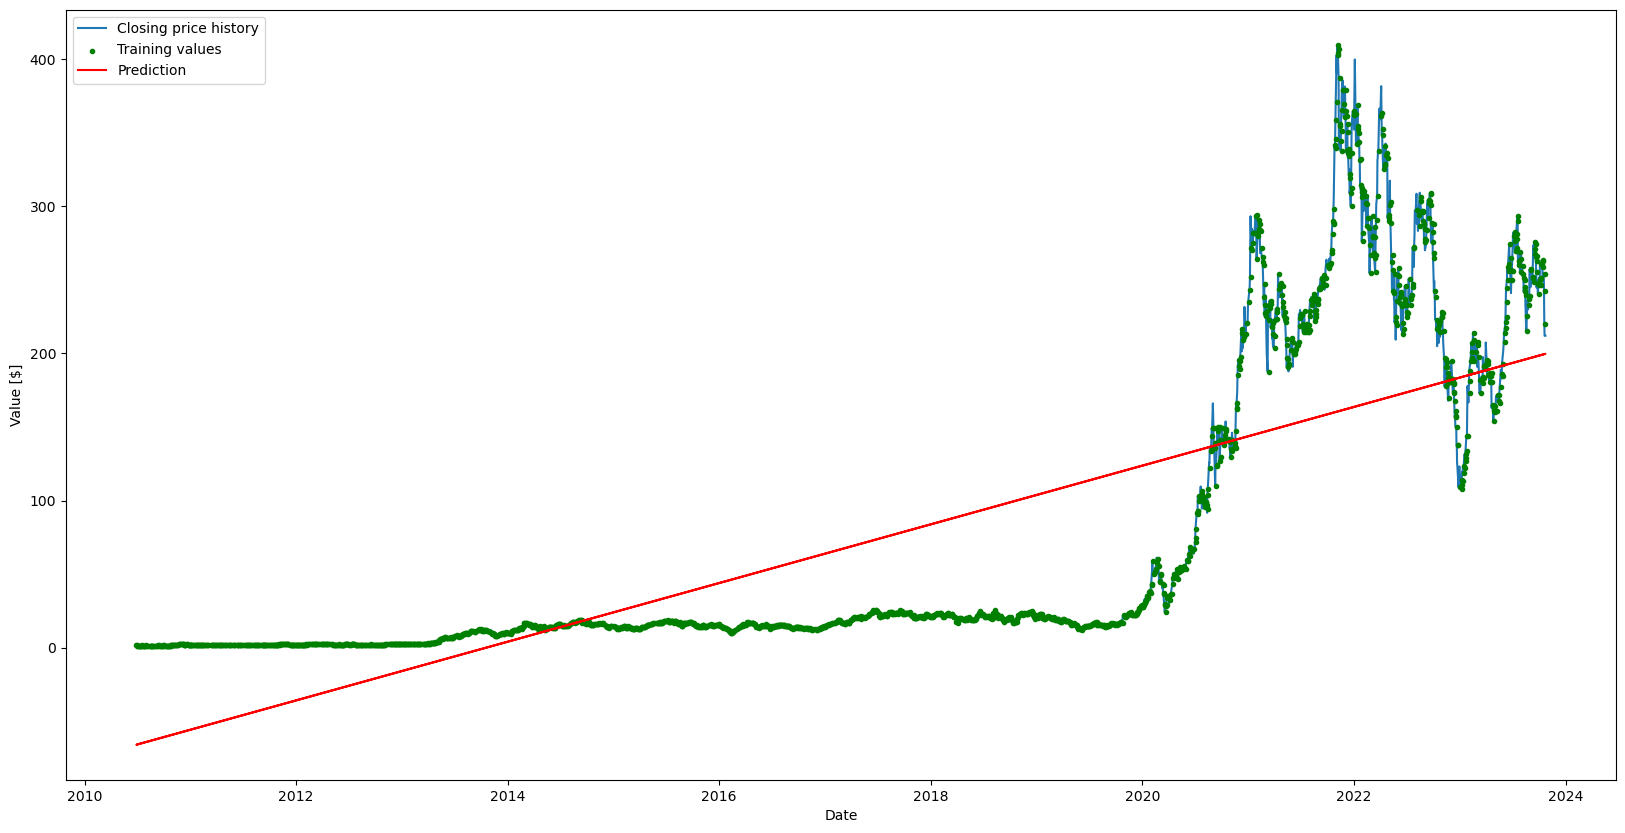

In [11]:
fig=plt.figure(figsize=(20, 10))

# Creating two subplots on the same position 111
# Plot two shares the same y-axis as plot1 and the frame around is hidden
plot1 = fig.add_subplot(111)
plot2 = fig.add_subplot(111, sharey=plot1, frame_on=False)

# Plot historical data
plot1.plot(df['Date'],df['Close'], label="Closing price history")
plot1.set_xlabel("Date")
plot1.set_ylabel("Value [$]")

# Plot training data
# Hide the values for x-axis because date in integer form is not easily readable by a person
# Hide the values for y-axis because it is the same axis as plot 1
plot2.scatter(x_train, y_train, color="green", marker=".", label="Training values")
plot2.axes.get_xaxis().set_visible(False)
plot2.axes.get_yaxis().set_visible(False)
plot2.plot(x_train, y_pred, color='red', label="Prediction")

# Combining labels and handles from both subplots
handle1, label1 = plot1.get_legend_handles_labels()
handle2, label2 = plot2.get_legend_handles_labels()
plot1.legend(handles=(handle1 + handle2), labels=(label1 + label2), loc="upper left")


In [12]:
# Calculate mean squared error value
print("MSE = " + str(mean_squared_error(y_train, y_pred)))

MSE = 4244.133908610887


In [13]:
old = (df['Date'] < '2020-01-01')
df.drop(df[old == True].index, inplace=True)
df

,Date,Close,Date_conv
2394,2020-01-02,28.684000,737426
2395,2020-01-03,29.534000,737427
2396,2020-01-06,30.102667,737430
2397,2020-01-07,31.270666,737431
2398,2020-01-08,32.809334,737432
...,...,...,...
3348,2023-10-17,254.850006,738810
3349,2023-10-18,242.679993,738811
3350,2023-10-19,220.110001,738812
3351,2023-10-20,211.990005,738813


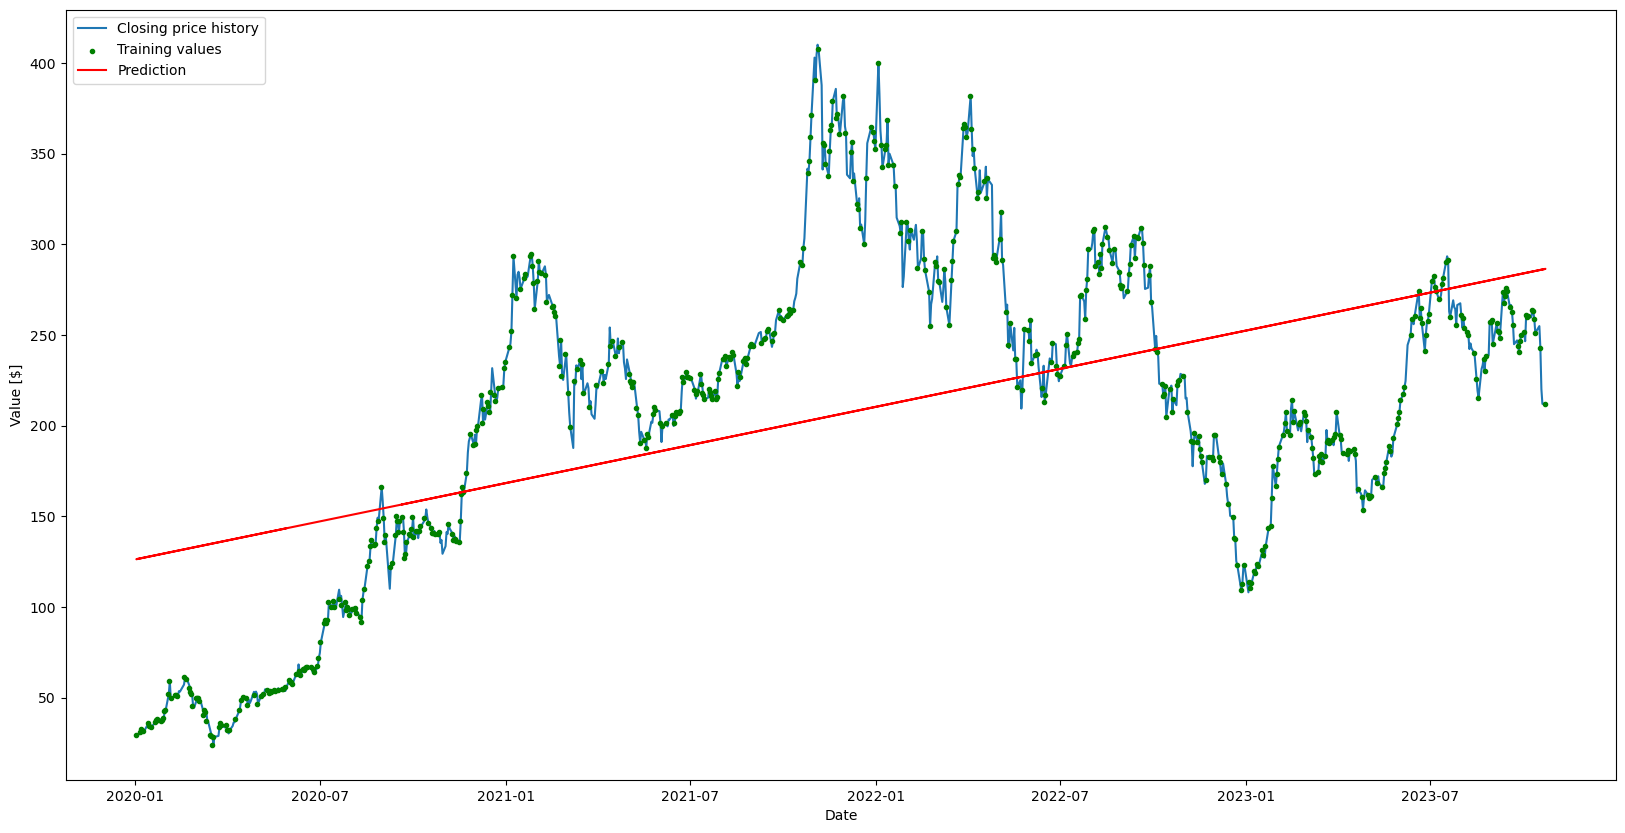

In [14]:
x = df["Date_conv"].values
y = df["Close"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Reshape array from 1D to 2D
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)

fig=plt.figure(figsize=(20, 10))

# Creating two subplots on the same position 111
# Plot two shares the same y-axis as plot1 and the frame is hidden
plot1 = fig.add_subplot(111)
plot2 = fig.add_subplot(111, sharey=plot1, frame_on=False)

# Plot historical data
plot1.plot(df['Date'],df['Close'], label="Closing price history")
plot1.set_xlabel("Date")
plot1.set_ylabel("Value [$]")

# Plot training data
# Hide the values for x-axis because date in integer form is not easily readable by a person
# Hide the values for y-axis because it is the same axis as plot 1
plot2.scatter(x_train, y_train, color="green", marker=".", label="Training values")
plot2.axes.get_xaxis().set_visible(False)
plot2.axes.get_yaxis().set_visible(False)
plot2.plot(x_train, y_pred, color='red', label="Prediction")

# Combining labels and handles from both subplots
handle1, label1 = plot1.get_legend_handles_labels()
handle2, label2 = plot2.get_legend_handles_labels()
plot1.legend(handles=(handle1 + handle2), labels=(label1 + label2), loc="upper left")

plt.savefig("TESLA_Predictions.png")
plt.show()

In [15]:
# Calculate mean squared error value
print("MSE = " + str(mean_squared_error(y_train, y_pred)))

MSE = 5448.107590794013


Unfortunately we get a higher MSE value, even though we removed data before value rose significantly

In [16]:
def predictPrice(date):
    date = datetime.strptime(date, "%Y-%m-%d")
    date_ordinal = date.toordinal()
    date_index = df.Date[df.Date == date].index.tolist()[0]
    
    prediction = lr.predict([[date_ordinal]])[0]
    real = df.Close[date_index]
    difference = prediction / real * 100
    print(f"Predicted price on {date} is: ${prediction:.2f}")
    print(f"Real value on {date} is: ${real:.2f}")
    print(f"Prediction is {difference:.2f}% of real value")
    print("MSE = " + str(mean_squared_error(y_train, y_pred)))
    

In [17]:
predictPrice("2020-09-21")

Predicted price on 2020-09-21 00:00:00 is: $156.54
Real value on 2020-09-21 00:00:00 is: $149.80
Prediction is 104.50% of real value
MSE = 5448.107590794013
